<a href="https://colab.research.google.com/github/emmettralston/Fit-Analysis-Ideal-Gas-Data/blob/main/RAD_15_SLDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload kaggle.json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emmettralston","key":"59bf103e9f5a2015964768b7d8437813"}'}

In [ ]:
import os
# Creates Kaggle directory
os.makedirs('/root/.kaggle/', exist_ok=True)

# Moves kaggle.json file to Kaggle directory
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
#Downloads dataset from kaggle
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
 98% 1.23G/1.25G [00:10<00:00, 103MB/s]
100% 1.25G/1.25G [00:10<00:00, 127MB/s]


In [5]:
!unzip plant-disease-recognition-dataset.zip -d /content/plant-disease-recognition-dataset

Archive:  plant-disease-recognition-dataset.zip
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: /content/plant-disease-recognition-dataset/Test/Test/Healthy/8e6a8

In [2]:
import os
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Number of images for test, train, and validation
def total_files(folder_path):
  num_files = len([i for i in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, i))])
  return num_files

train_files_healthy = "/content/plant-disease-recognition-dataset/Train/Train/Healthy"
train_files_unhealthy = "/content/plant-disease-recognition-dataset/Train/Train/Rust"


test_files_healthy = "/content/plant-disease-recognition-dataset/Test/Test/Healthy"
test_files_unhealthy = "/content/plant-disease-recognition-dataset/Test/Test/Rust"

validation_files_healthy = "/content/plant-disease-recognition-dataset/Validation/Validation/Healthy"
validation_files_unhealthy = "/content/plant-disease-recognition-dataset/Validation/Validation/Rust"

print('Num of healthy train files:', total_files(train_files_healthy))
print('Num of unhealthy train files:', total_files(train_files_unhealthy))
print()
print('Num of healthy test files:', total_files(test_files_healthy))
print('Num of unhealthy test files:', total_files(test_files_unhealthy))
print()
print('Num of healthy validation files:', total_files(validation_files_healthy))
print('Num of unhealthy validation files:', total_files(validation_files_unhealthy))

Num of healthy train files: 458
Num of unhealthy train files: 434

Num of healthy test files: 50
Num of unhealthy test files: 50

Num of healthy validation files: 20
Num of unhealthy validation files: 20


In [7]:
#Loading Data Sets of Images
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-disease-recognition-dataset/Train/Train",
    image_size=(225, 225),
    batch_size=16,
    seed=15,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-disease-recognition-dataset/Test/Test",
    image_size=(225, 225),
    batch_size=16,
    seed=15,
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-disease-recognition-dataset/Validation/Validation",
    image_size=(225, 225),
    batch_size=16,
    seed=15,
)

Found 1322 files belonging to 3 classes.
Found 150 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


In [8]:
#Normalizing data into values between 0 and 1
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))
validation_data = validation_data.map(lambda x, y: (normalization_layer(x), y))

In [13]:
#Compiling the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 223, 223, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
83/83 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.4925 - loss: 3.8358 - val_accuracy: 0.7167 - val_loss: 0.7107
Epoch 2/3
83/83 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.8163 - loss: 0.4455 - val_accuracy: 0.5833 - val_loss: 0.7517
Epoch 3/3
83/83 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.8287 - loss: 0.4378 - val_accuracy: 0.8167 - val_loss: 0.4828


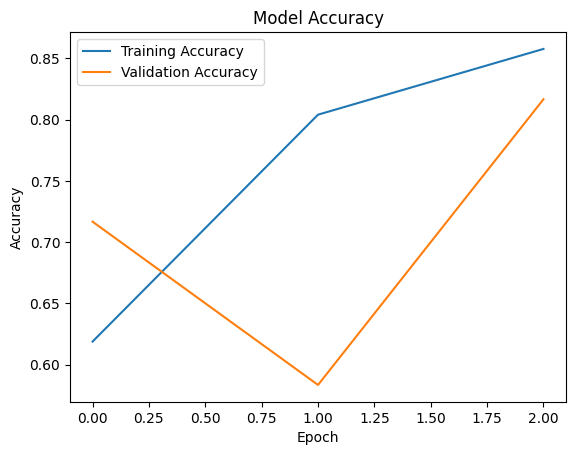

In [16]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()


In [17]:
#Convert model to tensor flow lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpmzutsxj5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 225, 225, 3), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138587860548272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138587638894080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138587638891792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138587638897424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138587638891088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138587638900768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138587638895840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138587638902352: TensorSpec(shape=(), dtype=tf.resource, name=None)
